In [1]:
import DMN3 as DMN
from matplotlib import pyplot as plt
import numpy as np
from helperfuncs import *

In [2]:
node = DMN.Node(np.ones(6)*2)
node.compliance
node.rotated_compliance = node.compliance
p1 = np.array([0.7243458035427647,-0.6624489424587073,0.0,0.7243458035427647,0.0,2.7735894920029462])
p2 = np.array([0.36757546481294456,-0.16233746963686535,0.0,0.3675754648129446,0.0,1.05982586889962])

node.left = DMN.Node(p1)
node.right = DMN.Node(p2)

node.right.rotated_compliance = node.right.compliance
node.left.rotated_compliance = node.left.compliance

node.rotated_compliance = homogenise(node.left.rotated_compliance, node.right.rotated_compliance,0.2,0.8)

In [3]:
node.delta_sigma = np.ones(3)*2
DMN.update_stress(node)



In [4]:
node.right.delta_sigma

array([2.21854509, 2.        , 2.        ])

In [5]:
node.left.delta_sigma

array([1.12581965, 2.        , 2.        ])

In [6]:
DMN.calc_elasto_plastic_operator(node),convert_vectorised(node.rotated_compliance)

(array([[ 0.40774137, -0.218641  ,  0.        ],
        [-0.218641  ,  0.3776457 ,  0.        ],
        [ 0.        ,  0.        ,  1.40257859]]),
 array([[ 0.40774137, -0.218641  ,  0.        ],
        [-0.218641  ,  0.3776457 ,  0.        ],
        [ 0.        ,  0.        ,  1.40257859]]))

In [7]:
res1 = np.ones((3,))* 2
res2 = np.ones((3,))  * 4

In [8]:
homogenise_res(node.left.rotated_compliance,node.right.rotated_compliance,0.5,0.5,res1,res2)

array([3.32673632, 2.54198944, 3.        ])

In [9]:
Model = DMN.Tree(3)
root = Model.initialise()

Model.propagate_weights(root)
Model.initialise_bottom_layer(root,p1,p2)


In [10]:
Model.homogenise_system_res(root,p1,p2)


In [11]:
root.res_strain,root.delta_eps

(array([-0.45275237,  0.25670246, -0.1834193 ]), array([0., 0., 0.]))

In [12]:
root.sigma = np.array([1,2,3])
Model.backwards_pass(root)

In [13]:
bottom_node = Model.fetch_node(root,3,6)

In [14]:
bottom_node.delta_sigma,bottom_node.delta_eps


DMN.return_mapping(root)

0.39871511512508495 0.39871511512508506


In [18]:
from DMN3 import xi

# def xi(node,delta_gamma):
#     D = convert_vectorised(node.rotated_compliance)
#     A = np.linalg.inv(D + delta_gamma *P)@ D
#     sigma = node.sigma
    
#     return sigma.T @A.T@P@A@sigma
    
def xi_prime_finite_diff(node,delta_gamma,delta=1e-6,sigma_trial=np.zeros((3,))):
   
    return (xi(node,delta_gamma + delta,sigma_trial) - xi(node,delta_gamma - delta,sigma_trial))/(2*delta)

def xi_prime_ana(node,delta_gamma,sigma_trial=np.zeros((3,))):
    D = convert_vectorised(node.rotated_compliance)
    C = np.linalg.inv(D)
    A = np.linalg.inv(D + delta_gamma *P)@ D
    
    middle_mat = P.T @C.T@ A.T + P@A@C


    return -sigma_trial.T@A.T@middle_mat@P@A@sigma_trial


/tmp/ipykernel_143011/3525872407.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


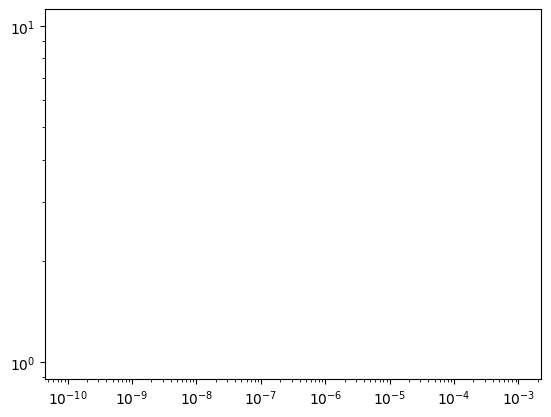

In [ ]:
import timeit

gamma = .23123
deltas = np.logspace(-10,-3,100)
res = np.zeros_like(deltas)


sigma_trial = np.array([1,2,3])
for index,delta in enumerate(deltas):
    res[index] = abs(xi_prime_finite_diff(root,gamma,delta,sigma_trial)-xi_prime_ana(root,gamma,sigma_trial))/abs(xi_prime_ana(root,gamma,sigma_trial))

plt.plot(deltas,res,marker='o',label='Finite Difference')
plt.xscale('log')
plt.yscale('log')


# t1 = timeit.timeit(lambda: xi_prime_finite_diff(root,gamma,1e-6))
# t2 = timeit.timeit(lambda: xi_prime_ana(root,gamma))


In [ ]:
# t1, t2